Principal Component Analysis (PCA)

In [1]:
"""
- It is a process of figuring out most important features or principal components that has most impact on target variable.

- PCA or principal component analysis is a dimensionality reduction technique that can help us reduce dimensions of dataset that we use in machine learning for training. 

Ex: Property Price Prediction, Handwritten Digits Recognition (0 -> black, 16 -> White)

- It helps us to address the dimensionality curse problem. 

- In this video we will understand what PCA is all about, write python code for handwritten digits dataset classification and then use PCA to train the same model using PCA.

- Few things to keep in mind before using PCA
    1. Scale features before applying PCA
    2. Accuracy might drop in some cases
    
"""

'\n- It is a process of figuring out most important features or principal components that has most impact on target variable.\n\n- PCA or principal component analysis is a dimensionality reduction technique that can help us reduce dimensions of dataset that we use in machine learning for training. \n\nEx: Property Price Prediction, Handwritten Digits Recognition (0 -> black, 16 -> White)\n\n- It helps us to address the dimensionality curse problem. \n\n- In this video we will understand what PCA is all about, write python code for handwritten digits dataset classification and then use PCA to train the same model using PCA.\n\n- Few things to keep in mind before using PCA\n    1. Scale features before applying PCA\n    2. Accuracy might drop in some cases\n    \n'

In [2]:
import pandas as pd 
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
# To visualize digits using matplotlib Convert 1D array into 2D array 
digits.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

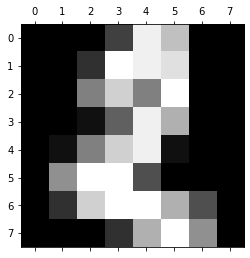

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.gray()
plt.matshow(digits.data[2].reshape(8, 8))

In [7]:
import numpy as np
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits.target[2]

2

In [9]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [11]:
X = df 
y = digits.target

In [12]:
""" 
Feature Scaling Technique:

    1. Normalization or Min-Max Scaling : 

        - X_new = (X - X_min)/(X_max - X_min)
        - Minimum and maximum value of features are used for scaling.
        - Scales values between [0, 1] or [-1, 1].
        - Scikit-Learn provides a transformer called MinMaxScaler for Normalization.
        - It is useful when we don’t know about the distribution
        - It is used when features are of different scales.	

    2. Standardization or Z-Score Normalization : 

        - X_new = (X - mean)/Std
        - Mean and standard deviation is used for scaling.
        - It is not bounded to a certain range.
        - Scikit-Learn provides a transformer called StandardScaler for standardization.
        - It is useful when the feature distribution is Normal or Gaussian.
        - It is used when we want to ensure zero mean and unit standard deviation
"""

' \nFeature Scaling Technique:\n\n    1. Normalization or Min-Max Scaling : \n\n        - X_new = (X - X_min)/(X_max - X_min)\n        - Minimum and maximum value of features are used for scaling.\n        - Scales values between [0, 1] or [-1, 1].\n        - Scikit-Learn provides a transformer called MinMaxScaler for Normalization.\n        - It is useful when we don’t know about the distribution\n        - It is used when features are of different scales.\t\n\n    2. Standardization or Z-Score Normalization : \n\n        - X_new = (X - mean)/Std\n        - Mean and standard deviation is used for scaling.\n        - It is not bounded to a certain range.\n        - Scikit-Learn provides a transformer called StandardScaler for standardization.\n        - It is useful when the feature distribution is Normal or Gaussian.\n        - It is used when we want to ensure zero mean and unit standard deviation\n'

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=30)

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [16]:
X.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [17]:
"""
By using PCA, first we remove useless columns and on other columns, we apply transformation and generate new features.

In PCA(), we can pass parameters in two ways:

    1. PCA(0.95) -> We tell that from our features, 95% variation capture or information extract and compute new principal components using fit_transform().
    
    2. PCA(n_components=10)
 
"""

'\nBy using PCA, first we remove useless columns and on other columns, we apply transformation and generate new features.\n\nIn PCA(), we can pass parameters in two ways:\n\n    1. PCA(0.95) -> We tell that from our features, 95% variation capture or information extract and compute new principal components using fit_transform().\n    \n    2. PCA(n_components=10)\n \n'

In [18]:
X.shape

(1797, 64)

In [19]:
from sklearn.decomposition import PCA 
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [20]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [21]:
# explained_variance_ratio_ -> Explains how much variation or information capture by 29 generated principal components
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [22]:
# Final computed features
pca.n_components_

29

In [23]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

In [25]:
""" 
Here, we observed that despite dropping lot of features, accuracy is almost same.
"""

' \nHere, we observed that despite dropping lot of features, accuracy is almost same.\n'

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [27]:
X_pca

array([[ -1.25946544,  21.27488258],
       [  7.9575964 , -20.76869283],
       [  6.99192885,  -9.955988  ],
       ...,
       [ 10.80129373,  -6.96025881],
       [ -4.87210324,  12.42395754],
       [ -0.3443683 ,   6.36553867]])

In [28]:
# Here, we capture 27% information from all features.
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [29]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

In [30]:

"""
Conclusion:
        So, we can decide what accuracy we want and then we can reduce our dataset dimensions accordingly.
"""

'\nConclusion:\n\n    So, we can decide what accuracy we want and then we can reduce our dataset dimensions accordingly.\n'